In [50]:
import pandas as pd
import glob
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
from plotnine import *
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("D:\\Summer Practicum\\1_Data\\earlyarrivals.csv")

In [52]:
len(df)
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,...,DepTimeBlk,CRSArrTime,ArrTime,ArrDelay,TaxiOut,TaxiIn,ArrTimeBlk,AirTime,Distance,CarrierDelay
0,2022,4,10,29,6,2022-10-29,UA,11066,CMH,"Columbus, OH",...,0600-0659,828,858.0,30.0,12.0,7.0,0800-0859,163.0,986.0,16.0
1,2022,4,10,29,6,2022-10-29,UA,12758,KOA,"Kona, HI",...,2100-2159,603,537.0,-26.0,12.0,9.0,0600-0659,277.0,2504.0,NaN
2,2022,4,10,29,6,2022-10-29,UA,14747,SEA,"Seattle, WA",...,0700-0759,1609,1559.0,-10.0,26.0,9.0,1600-1659,282.0,2402.0,NaN
3,2022,4,10,29,6,2022-10-29,UA,12889,LAS,"Las Vegas, NV",...,1900-1959,2050,2035.0,-15.0,15.0,3.0,2000-2059,71.0,414.0,NaN
4,2022,4,10,29,6,2022-10-29,UA,14685,SAV,"Savannah, GA",...,0600-0659,825,802.0,-23.0,10.0,5.0,0800-0859,94.0,708.0,NaN


In [53]:
date_df = df.copy()
date_df['ANext_5'] = None
date_df['ATaxi_5'] = None

In [54]:
date_df['ArrTime'] = date_df['ArrTime'].fillna(0).astype(int).astype(str).str.zfill(4)
date_df['FlightDate'] = pd.to_datetime(date_df['FlightDate'], format='%Y-%m-%d')
date_df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,...,ArrTime,ArrDelay,TaxiOut,TaxiIn,ArrTimeBlk,AirTime,Distance,CarrierDelay,ANext_5,ATaxi_5
0,2022,4,10,29,6,2022-10-29,UA,11066,CMH,"Columbus, OH",...,0858,30.0,12.0,7.0,0800-0859,163.0,986.0,16.0,None,None
1,2022,4,10,29,6,2022-10-29,UA,12758,KOA,"Kona, HI",...,0537,-26.0,12.0,9.0,0600-0659,277.0,2504.0,NaN,None,None
2,2022,4,10,29,6,2022-10-29,UA,14747,SEA,"Seattle, WA",...,1559,-10.0,26.0,9.0,1600-1659,282.0,2402.0,NaN,None,None
3,2022,4,10,29,6,2022-10-29,UA,12889,LAS,"Las Vegas, NV",...,2035,-15.0,15.0,3.0,2000-2059,71.0,414.0,NaN,None,None
4,2022,4,10,29,6,2022-10-29,UA,14685,SAV,"Savannah, GA",...,0802,-23.0,10.0,5.0,0800-0859,94.0,708.0,NaN,None,None


In [55]:
print(min(date_df['FlightDate']))
print(max(date_df['FlightDate']))

2022-04-01 00:00:00
2023-03-31 00:00:00


In [56]:
unique_ids = date_df['DestAirportID'].unique()
len(unique_ids)

374

In [74]:
# Rolling mean for ANext_5 and ATaxi_5 for every flight
window_size = 5
step = 0
steps = len(unique_ids)
for uid in unique_ids:
    print(f"Processing ID: {uid}")
    filtered = date_df[date_df['DestAirportID'] == uid].sort_values(by = ['FlightDate', 'ArrTime'])
    
    rolling_vals = (filtered['ArrDelay'].shift(-1).rolling(window = window_size, min_periods = 1).mean().shift(-(window_size - 1)))
    rolling_vals2 = (filtered['TaxiIn'].shift(-1).rolling(window = window_size, min_periods = 1).mean().shift(-(window_size - 1)))

    date_df.loc[filtered.index, 'ANext_5'] = rolling_vals
    date_df.loc[filtered.index, 'ATaxi_5'] = rolling_vals2

    step += 1

    print(f"Step {step}/{steps} completed.")

save_df = date_df.copy()

Processing ID: 12266
Step 1/374 completed.
Processing ID: 12892
Step 2/374 completed.
Processing ID: 11618
Step 3/374 completed.
Processing ID: 14771
Step 4/374 completed.
Processing ID: 14027
Step 5/374 completed.
Processing ID: 14747
Step 6/374 completed.
Processing ID: 13930
Step 7/374 completed.
Processing ID: 12173
Step 8/374 completed.
Processing ID: 13495
Step 9/374 completed.
Processing ID: 11884
Step 10/374 completed.
Processing ID: 11292
Step 11/374 completed.
Processing ID: 14893
Step 12/374 completed.
Processing ID: 14492
Step 13/374 completed.
Processing ID: 10299
Step 14/374 completed.
Processing ID: 11042
Step 15/374 completed.
Processing ID: 13204
Step 16/374 completed.
Processing ID: 11540
Step 17/374 completed.
Processing ID: 11057
Step 18/374 completed.
Processing ID: 14057
Step 19/374 completed.
Processing ID: 14683
Step 20/374 completed.
Processing ID: 14908
Step 21/374 completed.
Processing ID: 12264
Step 22/374 completed.
Processing ID: 10423
Step 23/374 complete

In [58]:
date_df.head(1)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,...,ArrTime,ArrDelay,TaxiOut,TaxiIn,ArrTimeBlk,AirTime,Distance,CarrierDelay,ANext_5,ATaxi_5
0,2022,4,10,29,6,2022-10-29,UA,11066,CMH,"Columbus, OH",...,0858,30.0,12.0,7.0,0800-0859,163.0,986.0,16.0,27.4,8.4


**Select one of the following**

In [146]:
date_df = save_df.copy()
len(date_df)

6898074

In [142]:
# Top_10 Dataframe
top_10_airports=['ATL','DFW','DEN','ORD','LAX','CLT','MCO','LAS','PHX','MIA']
top_df = date_df[date_df['Dest'].isin(top_10_airports)]
len(top_df)

2139123

In [143]:
# Alaska Airlines - AS
date_df = date_df[date_df['Operating_Airline '] == "AS"]
len(date_df)

228470

In [144]:
# JetBlue - B6
date_df = date_df[date_df['Operating_Airline '] == "B6"]
len(date_df)

0

In [145]:
# Allegiant Air - G4
date_df = date_df[date_df['Operating_Airline '] == "G4"]
len(date_df)

0

In [ ]:
# Frontier Airlines - F9
date_df = date_df[date_df['Operating_Airline '] == "F9"]
len(date_df)

**Primer code for graphs**

In [129]:
# All airports
date_df['ArrDelayBlk'] = (date_df['ArrDelay']//5)*5
date_df.head(10)
date_df[['ArrDelay', 'ArrDelayBlk']].head(10)

ADB_VC = date_df['ArrDelayBlk'].value_counts()

In [130]:
# Top 10 airports
top_df['ArrDelayBlk'] = (top_df['ArrDelay']//5)*5
top_df.head(10)
top_df[['ArrDelay', 'ArrDelayBlk']].head(10)

ADB_VC = top_df['ArrDelayBlk'].value_counts()

In [131]:
#Change the df depending on code above^
arrdelayblk_grouped_avg = date_df.groupby(['ArrDelayBlk'])[['ANext_5', 'ATaxi_5']].mean().reset_index().sort_values(by='ArrDelayBlk', ascending=True)
arrdelayblk_grouped_avg

,ArrDelayBlk,ANext_5,ATaxi_5
0,-75.0,-22.2,8.6
1,-70.0,1.723077,10.661538
2,-65.0,1.158333,9.669444
3,-60.0,-3.057343,8.73007
4,-55.0,1.983099,8.602254
...,...,...,...
272,1555.0,23.8,7.8
273,1615.0,29.8,10.4
274,1635.0,10.8,14.8
275,1710.0,176.0,14.0


In [132]:
# Change the df depending on code above^^
arrdelayblk_grouped_avg2 = date_df.groupby(['ArrDelayBlk']).agg(ANext_5 = ('ANext_5', 'mean'), count = ('ArrDelayBlk', 'count')).reset_index()
arrdelayblk_grouped_avg2

# Adjust limit to require at least x entries
limit = 20
arrdelayblk_grouped_avg = arrdelayblk_grouped_avg2[arrdelayblk_grouped_avg2['count'] >= limit]

**Zoom for graph**

In [133]:
# Full Range
arrdelayblk_grouped_avg_filt = arrdelayblk_grouped_avg[(arrdelayblk_grouped_avg['ArrDelayBlk'] <= 2000)].copy()

In [139]:
# Range between roughly -100 and 750
arrdelayblk_grouped_avg_filt = arrdelayblk_grouped_avg[(arrdelayblk_grouped_avg['ArrDelayBlk'] <= 750)].copy()

In [135]:
# Range between 50 and 400
arrdelayblk_grouped_avg_filt = arrdelayblk_grouped_avg[(arrdelayblk_grouped_avg['ArrDelayBlk'] <= 400) & (arrdelayblk_grouped_avg['ArrDelayBlk']  >= 50)].copy()

In [136]:
# Range between -50 and 200
arrdelayblk_grouped_avg_filt = arrdelayblk_grouped_avg[(arrdelayblk_grouped_avg['ArrDelayBlk'] <= 200) & (arrdelayblk_grouped_avg['ArrDelayBlk']  >= -50)].copy()

In [137]:
arrdelayblk_grouped_avg_filt['cumSum'] = arrdelayblk_grouped_avg_filt['count'].cumsum()

#arrdelayblk_grouped_avg_filt.to_csv("arrdelayblk_grouped_avg_filt.csv")

**Create the graph**

Red - #9C2C19

Blue - #0F6391

Pink - #E19B8C

Orange - #CB5017

Light Blue - #1E8ABC

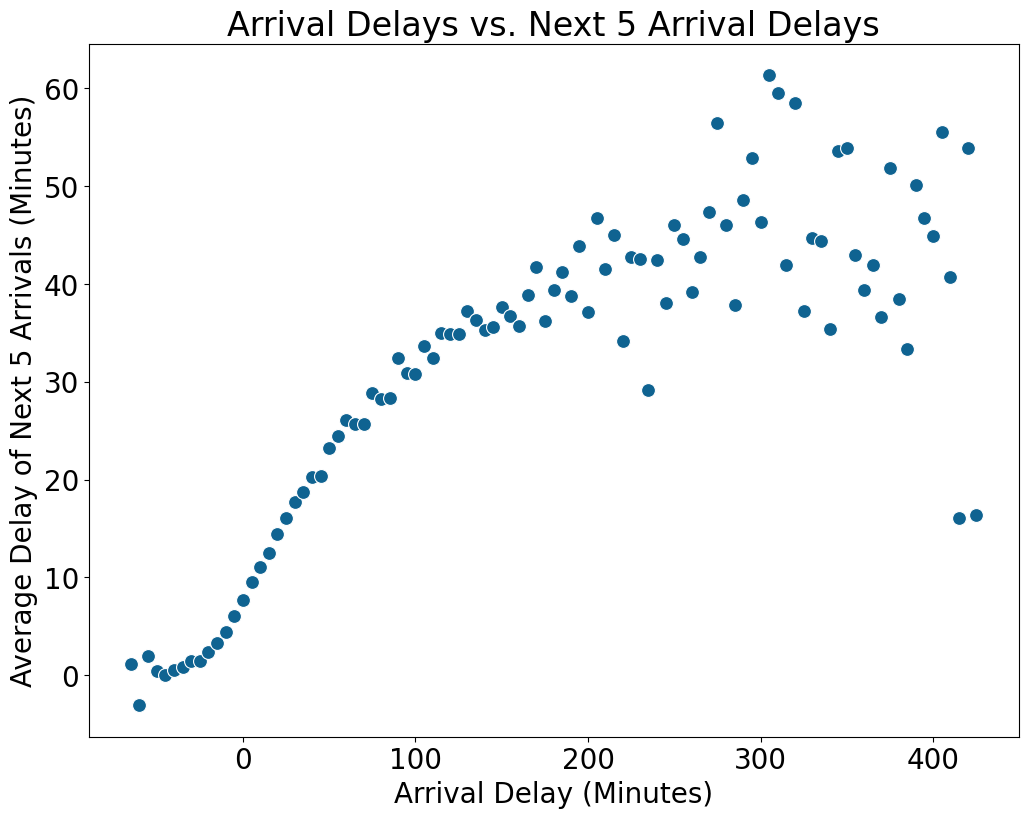

In [140]:
plt.figure(figsize=(12,9))
plt.rcParams.update({'font.size':20})
sns.scatterplot(data = arrdelayblk_grouped_avg_filt, x = "ArrDelayBlk", y = "ANext_5", color='#0F6391', s = 100)
plt.title("Arrival Delays vs. Next 5 Arrival Delays")
plt.xlabel("Arrival Delay (Minutes)")
plt.ylabel("Average Delay of Next 5 Arrivals (Minutes)")

plt.show()

"We've developed a quantized representation of arrival delays vs the delayed rolling mean of 5 consecutive arrival delays"

"This visual solidifies the fact that as the arrival delay increases, a ripple effect of delays is felt throughout the system, and thus we have decided to weight the frequency of delays over the average length of delay in our scoring model due to the impact of one airline's performance onto other airlines."

***Modeling Section***

Attempting to create a model for predicting consequent delays based on arrival time